In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
filename = "C:/Users/asus/Downloads/HousingData.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [66]:
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211

In [67]:
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [68]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [69]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)

In [70]:
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [73]:
y_pred = model.predict(X_test)


In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Model Evaluation:
Mean Squared Error (MSE): 0.2963492484793843
R-squared (R2): 0.6588520195508121


In [76]:
def predict_price(input_data):
    input_data_scaled = scaler.transform([input_data])
    price_scaled = model.predict(input_data_scaled)
    price = scaler.inverse_transform([[0]*X.shape[1] + [price_scaled[0]]])[-1, -1]
    return price

In [77]:
plt.figure(figsize=(20, 15))


<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Distribution of MEDV')

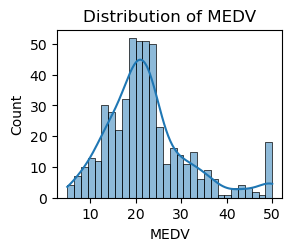

In [78]:
plt.subplot(2, 2, 1)
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV')


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

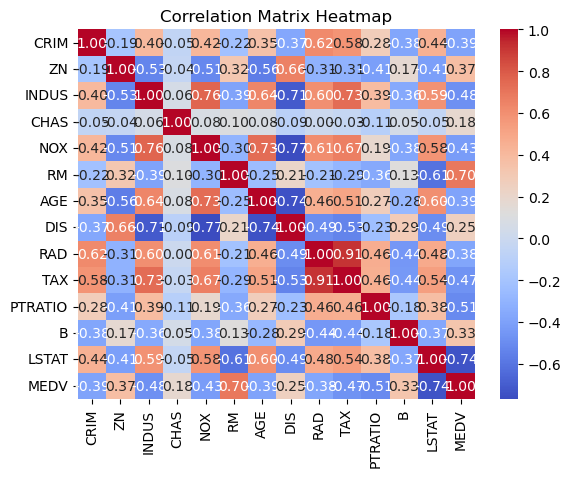

In [84]:
plt.subplot(1, 1, 1)
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')


Text(0.5, 1.0, 'Actual vs. Predicted MEDV')

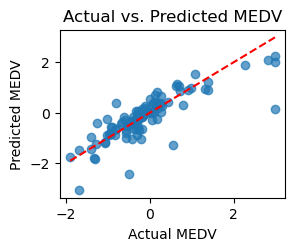

In [80]:
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')

Text(0.5, 1.0, 'Residuals Distribution')

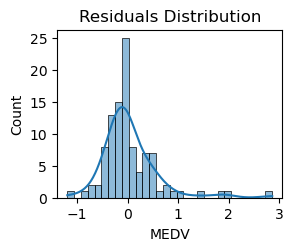

In [81]:
plt.subplot(2, 2, 4)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')

In [82]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>